# Introduction to Dynamic Programming

Topics:
1. Relationship between sequence problem and dynamic programming problem
2. The Contraction Mapping Theorem and Blackwell's sufficient conditions.
3. Value function iteration in a consumption-saving problem. Function approximation and interpolation.

## Sequence Problem and Dynamic Programming Problem

Reference: Stokey-Lucas, Ch 4.

Throughout this class we will use a consumption-saving problem as our main application. We start with a simple version with no idiosyncratic or aggregate uncertainty and no deterministic variation in income or interest rates. We assume standard regularity conditions on the utility function. 

The utility function is:
$$
\sup_{\{c_{t}\}_{t=0}^{\infty}}\sum_{t=0}^{\infty}\beta^t u(c_{t}) 
$$
The per-period budget constraint is:
$$
a_{t} = (1+ r)a_{t-1} + y - c_t \qquad \forall t\ge 0
$$
Initial wealth $a_{-1}$ is given.

#### Sequence Problem

A sequence problem is:
\begin{align*}
\sup_{\{x_{t}\}_{t=0}^{\infty}}&\sum_{t=0}^{\infty}\beta^t u(x_{t-1},x_t) \\
\text{s.t.  }\qquad &x_t \in \Gamma(x_{t-1})  \\
&x_{-1} \in X \text{ given}
\end{align*}

It is what it says on the tin: our goal is to find the sequence $\{x_{t}\}_{t=0}^{\infty}$ that solves this problem.

We can translate the consumption-saving problem into Sequence Problem notation:
$$
\sup_{\{a_{t}\}_{t=0}^{\infty}}\sum_{t=0}^{\infty}\beta^t u(a_{t} - (1+ r)a_{t-1} - y) 
$$
with $a_{-1}$ given and $\Gamma(a_{t-1})=\mathcal{R}$. We are looking for a sequence $\{a_t\}_{t=0}^{\infty}$ that solves this problem. 

#### Bellman Equation

The Bellman Equation is a functional equation of the form
$$
v(x) = \sup_{y\in \Gamma(x)} [F(x,y) + \beta v(y)]\qquad \forall x
$$
- $y = x'$ is next periods value of $x$.  
- The flow payoff is $F(x,y)$
- The current value function is $v(x)$. 
- The continuation value function is $v(y)$

The *function* $v(x)$ is a **solution** to the Bellman Equation.
- Holds for any $x$. Different from the sequence problem, in which we only look for one solution.
- Sometimes called a *functional solution* to the *functional* Bellman Equation.
- Not any old function will do.
- Does it exist? Is it unique?
- How does it relate to the solution of the sequence problem?

#### The Relationship between the Sequence Problem and the Bellman Equation

A solution to the Sequence Problem is also a solution to the Bellman Equation.
\begin{align*}
    v(x_{-1}) &= \sup_{\{x_{t} \in \Gamma(x_{t-1})\}_{t=0}^{\infty}}\sum_{t=0}^{\infty}\beta^t u(x_{t-1},x_t) \\
    &= \sup_{x_0 \in \Gamma(x_{-1})}\left[u(x_{-1},x_0) + \sup_{\{x_{t}\in \Gamma(x_{t-1})\}_{t=1}^{\infty}}\sum_{t=1}^{\infty}\beta^t u(x_{t-1},x_t)\right] \\
    &= \sup_{x_0 \in \Gamma(x_{-1})}\left[u(x_{-1},x_0) + \beta \sup_{\{x_{t}\in \Gamma(x_{t-1})\}_{t=1}^{\infty}}\sum_{t=0}^{\infty}\beta^t u(x_{t},x_{t+1})\right] \\
    &= \sup_{x_0 \in \Gamma(x_{-1})}\left[u(x_{-1},x_0) + \beta v(x_0)\right] 
\end{align*}

A solution to the Bellman Equation is also a solution to the Sequence Problem.
\begin{align*}
    v(x_{-1}) &= \sup_{y\in \Gamma(x_{-1})} [F(x_{-1},y) + \beta v(y)] \\
    &= \sup_{x_0\in \Gamma(x_{-1})} [F(x_{-1},x_0) + \beta v(x_0)] \\
    &= \sup_{x_0\in \Gamma(x_{-1})} [F(x_{-1},x_0) + \beta \sup_{x_1\in \Gamma(x_0)} [F(x_0,x_1) + \beta v(x_1)] ] \\
    &= \sup_{\{x_t\in \Gamma(x_{t-1})\}_{t=0}^{\infty}} \sum_{t=0}^{\infty} \beta^t F(x_{t-1},x_t)  \\
\end{align*}
Sufficient condition: $\lim_{T\rightarrow \infty}\beta^T v(x_T)=0$ for all feasible sequences.

Here is our consumption problem as a Bellman Equation:
\begin{align*}
v(a) &= \sup_{c\in \mathcal{R}} [u(c) + \beta v(a')]\qquad \forall a \\
&= \sup_{c\in \mathcal{R}} [u(c) + \beta v((1+r)a + y - c)]\qquad \forall a
\end{align*}


#### Why do we use the Bellman Equation?

1. In deterministic applications the difference between a sequence and a function is not particularly important.
2. With uncertainty, a different sequence is a solution for different realization of the shocks. This is impossible to calculate one-by-one. So we need to find a functional solution to the sequence problem anyway.
3. The Bellman Equation efficiently exploits the regularity in standard economic problems and allows to apply the Contraction Mapping Theorem.


## The Contraction Mapping Theorem and Blackwell's sufficient conditions.

Define the *Bellman operator* $B$ on a function $w$ as,
$$
(Bw)(x) \equiv sup_{x'\in \Gamma(x)}[F(x,x') + \beta w(x')]\qquad \forall x
$$
- $B$ maps a function $w$ to a new function $Bw$. It is called a *functional operator*.
- Expressed pointwise but applies to all values of x
- The argument (input function) $w$ may or may not be a solution to the Bellman Equation.

Suppose $v$ is a solution to the Bellman Equation. Then,
\begin{align*}
    (Bv)(x) &= sup_{x'\in \Gamma(x)}[F(x,x') + \beta v(x')]\qquad \forall x \\
    &= v(x)
\end{align*}
by the definition of $v$. 

Hence the solution to the Bellman Equation $v$ is a *fixed point* of the operator $B$. $(Bv)(x)=v(x)$ for all $x$.

We next show that repeatedly applying the Bellman operator allows us to find the solution to the Bellman Equation.

**Definition**: Let $(S, d)$ be a metric space and $T:S\rightarrow S$ a function mapping $S$ into itself. $T$ a contraction mapping (with modulus $\delta$) if for some $\delta\in(0,1)$, $d(Tx, Ty) = \delta d(x, y)$, for all $x,y\in S$.

Intuition: $T$ is a contraction mapping if operating $T$ on any two functions
moves in the metric space them strictly closer together: $Tf$ and $Tg$ are strictly closer together than $f$ and $g$.

**Contraction Mapping Theorem:** If $(S, d)$ is a complete metric space and $T:S\rightarrow S$ is a contraction mapping with modulus $\delta$, then
1. It has exactly one fixed point $v$ in $S$, and
2. for any $v_0 \in S$, $d (T^n v_0, v) \le \delta^n d(v_0, v)$, $n = 0, 1, 2, \dots$

The Contraction Mapping Theorem tells us that there a unique solution, and that repeatedly applying the contraction mapping allows us to find that solution.

Establishing that the contraction mapping holds is typically easiest using Blackwell's sufficient conditions (not necessary!).

**Blackwell's Theorem**: Let $X\subseteq  \mathbf{R}^L$ and let $B(X)$ be a space of bounded functions $f:X\rightarrow \mathbf{R}^L$, with the sup norm. Let $T: B(X)\rightarrow B(X)$ be an operator satisfying
1. (monotonicity) $f, g \in B(X)$ and $f(x) \le g(x)$, for all $x \in X$, implies $(Tf)(x) \le (Tg)(x)$, for all $x\in X$;\\
1. (discounting) there exists some $\beta \in (0, 1)$ such that $[T(f+a)](x)\le (Tf)(x)+ \beta a$, $\forall f\in B(X),a\ge 0,x\in X$. 

Monotonicity is natural in economic value functions. E.g., more wealth is better. We would need to show that the Bellman operator preserves that monotonicity. Similarly, discounting naturally follows time discounting.

We will focus on how to use these methods on the computer. See Stokey-Lucas for proofs.

## So How Do We Do This?

1. Representing a function on a grid.
2. Interpolate between grid points.
3. Solve for optimal consumption.
4. Iterate on Bellman operator until convergence.

### Step 1: approximate function

On the computer we represent a continuous function $f(x)$, $x\in \mathbf{R}^L$ using a collection of arguments and values $\{x_n,y_n\}_{n=1}^N$.

In [2]:
# packages we need to get started
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

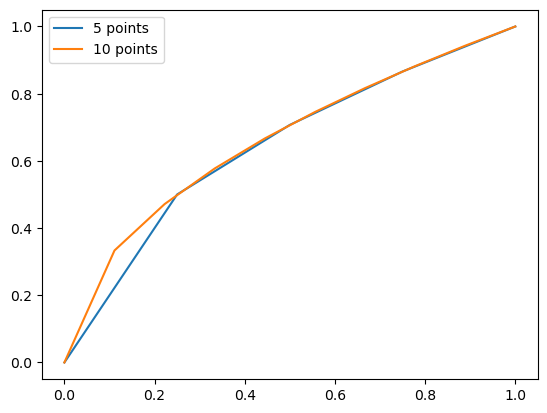

In [88]:
# create grids of points from 0 to 1 that are 5, 10 points long
x_1 = np.linspace(0, 1, 5)
x_2 = np.linspace(0, 1, 10)

# represent the function y = x^0.5 using the three grids
y_1 = np.sqrt(x_1)
y_2 = np.sqrt(x_2)

# plot the three functions
plt.plot(x_1, y_1, '-', label='5 points')
plt.plot(x_2, y_2, '-', label='10 points')
plt.legend()
plt.show()

# now repeat for 100 and 1000 points

### Step 2: interpolate between grid points

In this example we know the true function. So if we wanted to evaluate the function at a point $x \notin \{x_n\}_n$ we could simply calculate the value. In practice, we generally do not know what the function looks like analytically, so we have to find another way to evaluate $f(x)$. 

The solution is to interpolate. Find the two values that bracket $x$, $x_i$ and $x_{i+1}$. Linear interpolation means we assume the function is locally linear.
$
f(x) = y_{i} + \frac{x-x_{i}}{x_{i+1}-x_i}(y_{i+1} - y_i )
$
This is effectively what the graph above does. 

There are more complicated interpolation methods called splines. These can preserve monotonicity, continuity, and allow for differentiation. Sometimes this can be important. 

In our applications linear interpolation will generally suffice and that is what we will focus on. As we will see, linear interpolation can be very accurate unless there is a lot of curvature locally--as we know from the Taylor approximation. But in that case it helps to allocate more grid points to the area with more curvature.

/var/folders/r8/qzy1wb995zn058xq2zb0zzn40000gn/T/ipykernel_49686/779828110.py:12: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(x_interp, np.sqrt(x_interp), '-', label='True function')


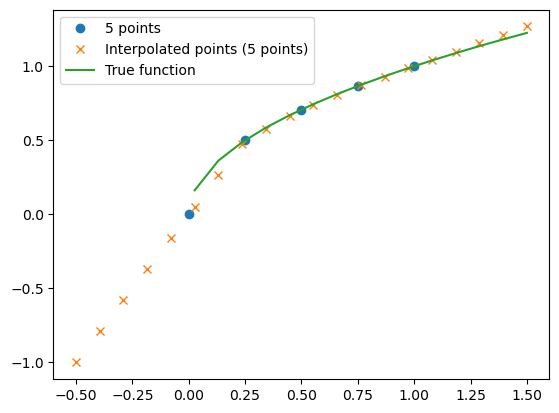

In [92]:
# set up interpolation function
f_1 = interp1d(x_1, y_1, kind='linear', bounds_error=False, fill_value='extrapolate')
f_2 = interp1d(x_2, y_2, kind='linear', bounds_error=False, fill_value='extrapolate')

# take the collection of points x_1 and y_1 and interpolate to between -0.1 and 1.1
x_interp = np.linspace(-0.5, 1.5, 20)
y_interp_1 = f_1(x_interp)

# plot the interpolated points along with x_1 and y_1, and true square root function
plt.plot(x_1, y_1, 'o', label='5 points')
plt.plot(x_interp, y_interp_1, 'x', label='Interpolated points (5 points)')
plt.plot(x_interp, np.sqrt(x_interp), '-', label='True function')
plt.legend()
plt.show()

# repeat for 10 points

### Step 3: solve the consumption problem

We have everything to get started on our consumption-savings problem. Recall is our consumption problem as a Bellman Equation:
\begin{align*}
v(a) &= \sup_{c\in \mathcal{R}} [u(c) + \beta v((1+r)a + y - c)]\qquad \forall a
\end{align*}

We will assume the utility function $u(c) = \ln(c)$

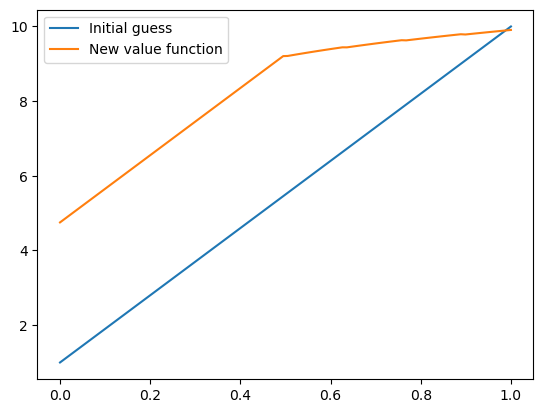

In [17]:
# fix parameters beta, r, and y
beta = 0.99
r = (1/beta) - 1
y = 1
amin = 0
amax = 1
grid_size = 100

# define asset grid
a = np.linspace(amin, amax, grid_size)

# initial guess for the value function
v0 = np.linspace(1, 10, grid_size)

# define utility function --- makes it easy to change later
def utility(c):
    return np.log(c)

# we need to solve for the optimal consumption choice. we will do this the complicated way now, and the much easier way later. we will try all possible consumption choices and find the one that maximizes utility. 
c_candidates = y + np.linspace(-0.5, 2, 1000)

# matrix that holds a' given c_candidates and a
# Note: columns are a, and rows are c_candidates. 
# np.newaxis is used to make sure the dimensions are correct
# Python automatically expands the dimensions of a and c_candidates to make the matrix operation work
a_prime_candidates = (1+r)*a[np.newaxis, :] + y - c_candidates[:, np.newaxis] 

# interpolate value function at a' given c_candidates
# np.interp interpolates on the columns (last dimension) of a_prime_candidates
# want to penalize deviations outside the grid, so we use large negative values as a fill value
f_interp = interp1d(a, v0, kind='linear', bounds_error=False, fill_value=(-10000, 0))
v_prime_candidates = f_interp(a_prime_candidates)

# calculate utility for all possible consumption choices
utility_values = utility(c_candidates[:, np.newaxis]) + beta * v_prime_candidates

# find the consumption choice that maximizes utility
c_index = np.argmax(utility_values, axis=0) 
c = c_candidates[c_index]
v_new = np.max(utility_values, axis=0)

# plot initial and new value function
plt.plot(a, v0, label='Initial guess')
plt.plot(a, v_new, label='New value function')
plt.legend()
plt.show()

### Step 4: Repeat the steps until the value function converges

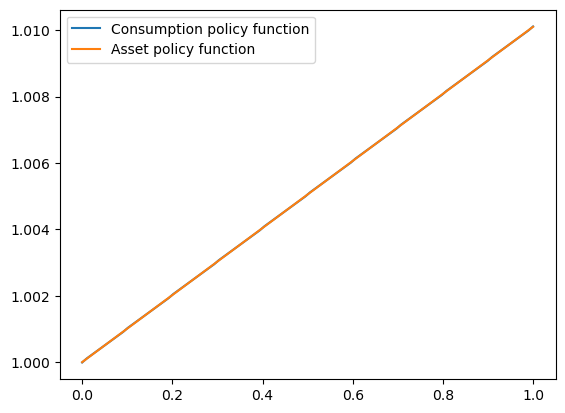

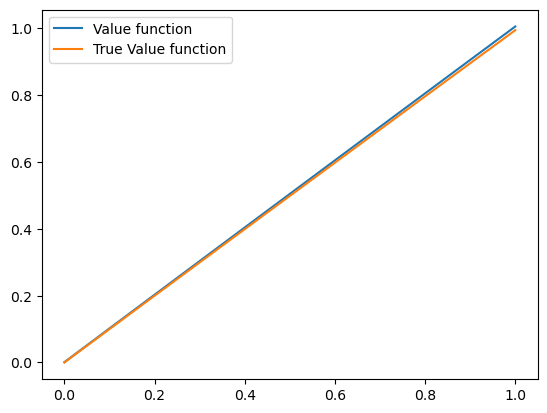

[0.99999    1.00011001 1.00021002 1.00031003 1.00041004 1.00051005
 1.00061006 1.00071007 1.00081008 1.00091009 1.0010301  1.00113011
 1.00123012 1.00133013 1.00143014 1.00153015 1.00163016 1.00173017
 1.00183018 1.00193019 1.00205021 1.00215022 1.00225023 1.00235024
 1.00245025 1.00255026 1.00265027 1.00275028 1.00285029 1.0029503
 1.00307031 1.00317032 1.00327033 1.00337034 1.00347035 1.00357036
 1.00367037 1.00377038 1.00387039 1.0039704  1.00409041 1.00419042
 1.00429043 1.00439044 1.00449045 1.00459046 1.00469047 1.00479048
 1.00489049 1.0049905  1.00511051 1.00521052 1.00531053 1.00541054
 1.00551055 1.00561056 1.00571057 1.00581058 1.00591059 1.0060106
 1.00613061 1.00623062 1.00633063 1.00643064 1.00653065 1.00663066
 1.00673067 1.00683068 1.00693069 1.0070307  1.00715072 1.00725073
 1.00735074 1.00745075 1.00755076 1.00765077 1.00775078 1.00785079
 1.0079508  1.00805081 1.00817082 1.00827083 1.00837084 1.00847085
 1.00857086 1.00867087 1.00877088 1.00887089 1.0089709  1.009070

In [20]:
# repeat the process until the value function converges
max_iter = 2000
tolerance = 1e-5
iteration = 0

v_new = v0

beta = 0.99
r = (1/beta) - 1
y = 1
amin = 0
amax = 1
grid_size = 100

c_candidates = y + np.linspace(-0.1, 0.1, 10000)

# loop until the value function converges and plot policy function and value function
while iteration < max_iter:
    v_old = v_new
    a_prime_candidates = (1+r)*a[np.newaxis, :] + y - c_candidates[:, np.newaxis] 
    f_interp = interp1d(a, v_old, kind='linear', bounds_error=False, fill_value=(-10000, 0))
    v_prime_candidates = f_interp(a_prime_candidates)
    utility_values = utility(c_candidates[:, np.newaxis]) + beta * v_prime_candidates
    c_index = np.argmax(utility_values, axis=0) 
    c = c_candidates[c_index]
    v_new = np.max(utility_values, axis=0)

    if np.max(np.abs(v_new - v_old)) < tolerance:
        break
    iteration += 1

# plot consumption against true consumption function
plt.plot(a, c, label='Consumption policy function')
plt.plot(a, y + r * a, label='Asset policy function')
plt.legend()
plt.show()

# plot value function
plt.plot(a, v_new, label='Value function')
plt.plot(a, utility(y + r * a) / r, label='True Value function')
plt.legend()
plt.show()
    
print(c)

    